In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import librosa as lr
import librosa.display
import IPython.display as ipd

In [3]:
data_dir = "./Audio"
audio_files = glob(data_dir + "/*.wav")

In [4]:
data = pd.DataFrame()
Emotion = []
Emotional_Intensity = []
Statement = []
Statement_Text = []
Repetition = []
Actor = []

In [5]:
for i in range(len(audio_files)):
    temp = audio_files[i][audio_files[i].index("\\")+1:audio_files[0].index(".wav")].split("-")
    
    # creating Emotion
    if temp[2] == "01":
        Emotion.append(1)
    if temp[2] == "02":
        Emotion.append(2)
    if temp[2] == "03":
        Emotion.append(3)
    if temp[2] == "04":
        Emotion.append(4)
    if temp[2] == "05":
        Emotion.append(5)
    if temp[2] == "06":
        Emotion.append(6)
    if temp[2] == "07":
        Emotion.append(7)
    if temp[2] == "08":
        Emotion.append(8)

   ############################

    # creating Emotinal_Intensity
    if temp[3] == "01":
        Emotional_Intensity.append(1)
    if temp[3] == "02":
        Emotional_Intensity.append(2)
        
   #############################

    # creating Statement
    if temp[4] == "01":
        Statement.append(1)
        Statement_Text.append("Kids are talking by the door")
    if temp[4] == "02":
        Statement.append(2)
        Statement_Text.append("Dogs are sitting by the door")
        
    ############################
    
    # creating Repetition
    if temp[5] == "01":
        Repetition.append(1)
    if temp[5] == "02":
        Repetition.append(2)
        
    ###########################
    
    # creating actor gender
    if int(temp[6])%2 == 0:   # even --> female
        Actor.append(1)
    if int(temp[6])%2 == 1:   # odd --> male
        Actor.append(0)    


In [6]:
data["Emotion"] = Emotion
data["Emotional_Intensity"] = Emotional_Intensity
data["Statement"] = Statement
data["Statement_Text"] = Statement_Text
data["Repetition"] = Repetition
data["Actor_Gender"] = Actor

In [7]:
import os
import wave
import pylab
#functions for extracting spectogram images
def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.savefig(wav_file[8:-4]+".png")
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

In [ ]:
#creating spectogram images from audio
for i in audio_files:
    temp=i
    graph_spectrogram(temp)

In [8]:
#normalizing data
def normalize_gray(array):
    return (array - array.min())/(array.max() - array.min())

In [ ]:
from PIL import Image
import os
#this method creates resized gray-level spectogram images from original spectogram images.
def resize(image_file):
    img_org = Image.open(image_file).convert("L")
    width_org, height_org = img_org.size
    #resizing factor in this case it is 0.2
    factor = 0.20
    width = int(width_org * factor)
    height = int(height_org * factor)
    img_anti = img_org.resize((width, height), Image.ANTIALIAS)
    name, ext = os.path.splitext(image_file)
    new_image_file = "%s%s" % (name,ext)
    img_anti.save(new_image_file)

In [9]:
#resizing original spectogram images
data_dir1 = "E:/Masaüstü/spectogramresized"
spectogram_images = glob(data_dir1 + "/*.png")
for i in spectogram_images:
    resize(i)

In [10]:
dataset=[]
from PIL import Image
for i in spectogram_images:
    myTemp=Image.open(i)
    myArray=np.asarray(myTemp, dtype="float32")
    dataset.append(normalize_gray(myArray))

Train on 1008 samples, validate on 432 samples
Epoch 1/20
1008/1008 [==============================] - 94s 93ms/step - loss: 2.1120 - accuracy: 0.1458 - val_loss: 2.0646 - val_accuracy: 0.1481
Epoch 2/20
1008/1008 [==============================] - 102s 102ms/step - loss: 1.9787 - accuracy: 0.2173 - val_loss: 1.8642 - val_accuracy: 0.3032
Epoch 3/20
1008/1008 [==============================] - 106s 105ms/step - loss: 1.7758 - accuracy: 0.3363 - val_loss: 1.8201 - val_accuracy: 0.3056
Epoch 4/20
1008/1008 [==============================] - 92s 92ms/step - loss: 1.5161 - accuracy: 0.4514 - val_loss: 1.7607 - val_accuracy: 0.3819
Epoch 5/20
1008/1008 [==============================] - 88s 87ms/step - loss: 1.2858 - accuracy: 0.5417 - val_loss: 1.6654 - val_accuracy: 0.3912
Epoch 6/20
1008/1008 [==============================] - 90s 89ms/step - loss: 1.0796 - accuracy: 0.6260 - val_loss: 1.6528 - val_accuracy: 0.4676
Epoch 7/20
1008/1008 [==============================] - 92s 91ms/step - l

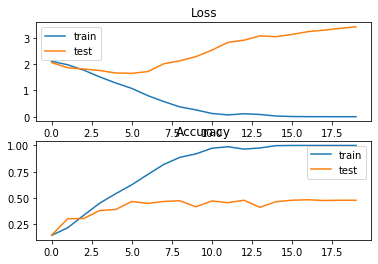

In [12]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset),data["Emotion"].to_numpy(), test_size=0.30, random_state=42,shuffle=True)
X_train = X_train.reshape(len(X_train),273,172,1)
X_test = X_test.reshape(len(X_test),273,172,1)
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(273,172,1)))
model.add(Dense(9, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Flatten())
model.add(Dense(9, activation="softmax"))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history =model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()